In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
from gym_glimpseEnv import GlimpseEnv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
import torchvision
from scipy.misc import imresize
from data_preparation import ScatterGenerator
from torch.utils.data import DataLoader
from torch.autograd import Variable
import time
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


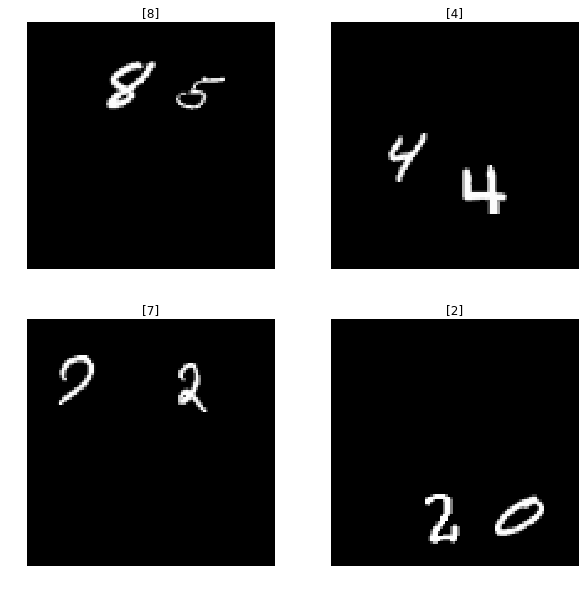

In [3]:
mmScatter = ScatterGenerator('mnist', 2, 1)

nx = ny = 2
f, AX = plt.subplots(nx, ny, figsize=[10, 10])
AX = np.reshape(AX, [-1])
for i, sample in enumerate(mmScatter):
    if i > nx*ny - 1:
        break
    ax = AX[i]
    ax.imshow(sample['features'][0].permute(1, 2, 0).numpy()[..., 0], 'gray')
    ax.set_title(', '.join([str(l[0]) for l in list(sample['labels'].numpy())]))
    ax.axis('off')


In [4]:
N_samples = 1000.
t_0 = time.time()
for i in range(int(N_samples)):
# for i, sample in enumerate(mmScatter):
    sample = next(mmScatter)
    if i == N_samples:
        break
    f = sample['features']
    f.zero_()
t_stop = time.time() - t_0
t_dur_nc = N_samples / t_stop
t_s_nc = t_stop / N_samples

t_0 = time.time()
for i in range(int(N_samples)):
# for i, sample in enumerate(mmScatter):
    sample = next(mmScatter)
    if i == N_samples:
        break
    f = sample['features']
    f.cuda()
    f.zero_()
t_stop = time.time() - t_0
t_dur_c = N_samples / t_stop
t_s_c = t_stop / N_samples

print('no cuda: {:4.2f} samples/sec {:4.3f} sec/sample'.format(t_dur_nc, t_s_nc))
print('   cuda: {:4.2f} samples/sec {:4.3f} sec/sample'.format(t_dur_c, t_s_c))

Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
Had to redraw
no cuda: 964.13 samples/sec 0.001 sec/sample
   cuda: 134.94 samples/sec 0.007 sec/sample


In [19]:
env = GlimpseEnv(mmScatter, extract_mode='bilinear')
low_res, imsize = env.reset()

vmin = np.min(low_res.cpu().numpy())
vmax = np.max(low_res.cpu().numpy())

In [20]:
low_res, imsize = env.reset()

In [21]:
plt.imshow(np.squeeze(low_res[0].permute(1, 2, 0).cpu().numpy(), -1), 'gray')

In [22]:
plt.imshow(np.squeeze(env.image.cpu().numpy()), 'gray')

In [23]:
N_y = N_x = 7
ps = np.linspace(1, 120, num=4)

In [24]:
P = []
for x in tqdm(np.linspace(-120, 120, num=N_x)):
    Py = []
    for y in tqdm(np.linspace(-120, 120, num=N_y)):
        patches = []
        for p in ps:
            # print(p)
            loc = [x, y]
            loc = Variable(torch.FloatTensor(loc))
            p = Variable(torch.FloatTensor([p]))
            action = {'location': loc, 'patch_size': p, 'pred_signal': None, 'prediction': None}
            env.restart()
            obs, r, term, info = env.step(action)
            patches.append(obs)
        Py.append(patches)
    P.append(Py)

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

In [12]:
n_x = len(P)
n_y = len(P[0])

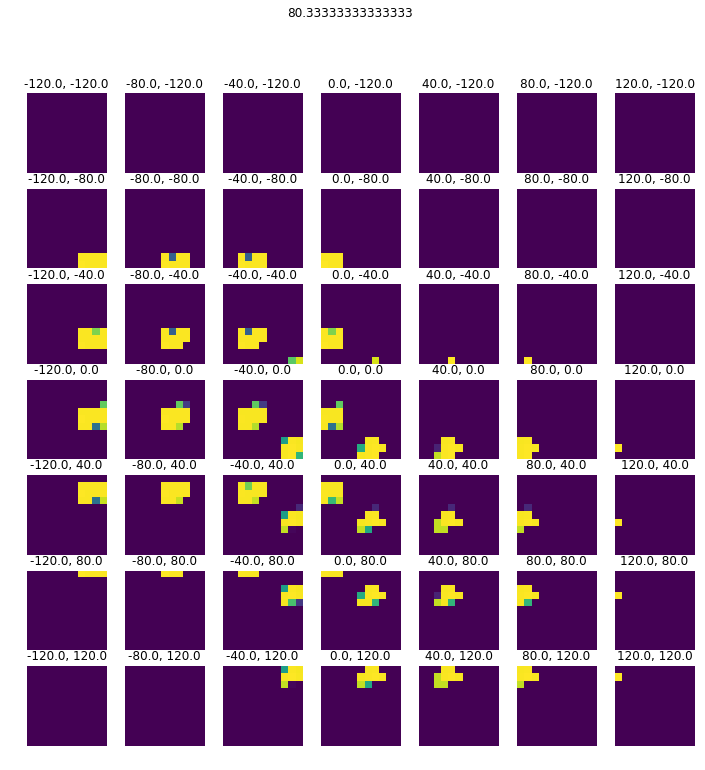

In [37]:
for k, p in enumerate(ps):
    f, AX = plt.subplots(n_x, n_y, figsize=[12, 12])
    f.suptitle('{}'.format(p))
    for i, y in enumerate(np.linspace(-120, 120, num=N_y)):
        for j, x in enumerate(np.linspace(-120, 120, num=N_x)):
            ax = AX[i, j]
            im = P[j][i][k].cpu()
            im = np.squeeze(im.squeeze(0).permute(1, 2, 0).numpy(), -1)
            ax.imshow(im)  # , vmin=vmin, vmax=vmax)
            ax.set_title('{:2.1f}, {:2.1f}'.format(x, y))
            ax.axis('off')